This notebook is to simulate a voxel population with random + coding related noise correlations. We will then test the performance of the Baysian Decoder model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DecodeSNC import fun_basis

In [159]:
n_vox = 100
n_chan = 8
n_trials = 1000
trials = np.random.uniform(0,2*np.pi,n_trials)
W = np.random.randn(n_vox,n_chan) # relative contribution of each channel, n_vox x n_chan
C = fun_basis(trials) # n_trials x n_chan
tuning_centers = np.arange(0,2*np.pi-.001,np.pi/4)

# tau = np.random.randn(n_vox)*.2+3
tau = np.random.randn(n_vox)*.03+.7

# No Noise Voxel Response 

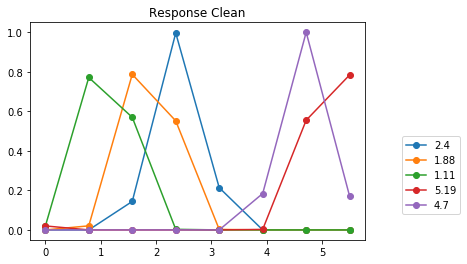

In [221]:
R_clean = W@C.T # Simulated voxel response, no noise. (n_vox x n_trials)
W_est = R_clean@C@np.linalg.pinv(C.T@C) # estimate of Weights from noise-less voxels (n_vox x n_chan)
C_est = np.linalg.pinv(W_est.T@W_est)@W.T@R_clean # estimate of responses from W_est (n_chan x n_trials)

R_clean_nse = R_clean -  W_est@C_est

plt.plot(tuning_centers,C_est[:,:5],'o-')
plt.legend(np.round(trials[:5],2), bbox_to_anchor=(1.3, 0.5))
plt.title('Response Clean')
plt.show()

# Random Noise Voxel Response 

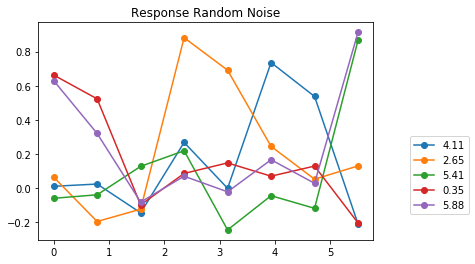

In [92]:
R_rNoise = W@C.T + np.random.randn(n_vox,n_trials)# Simulated voxel response, no noise. (n_vox x n_trials)
W_est = R_rNoise@C@np.linalg.pinv(C.T@C) # estimate of Weights from noise-less voxels (n_vox x n_chan)
C_est = np.linalg.pinv(W_est.T@W_est)@W.T@R_rNoise # estimate of responses from W_est (n_chan x n_trials)

plt.plot(tuning_centers,C_est[:,:5],'o-')
plt.legend(np.round(trials[:5],2), bbox_to_anchor=(1.3, 0.5))
plt.title('Response Random Noise')
plt.show()

# Correlated Noise Voxel Response 

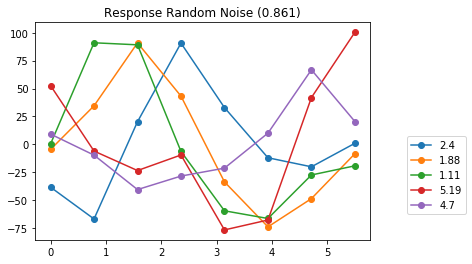

In [213]:
rho = .8  # not important for decoding it seems
sig = .05 # more correlated noise makes worse
cov_sim = (1-rho)*np.diagflat(tau**2) + rho*(np.outer(tau,tau)) + (sig**2) * (W @ W.T)
Q = np.linalg.cholesky(cov_sim)
noise = (Q @ np.random.randn(n_vox,n_trials))

R_corrNoise = W@C.T + noise
W_est = R_rNoise@C@np.linalg.pinv(C.T@C) # estimate of Weights from noise-less voxels (n_vox x n_chan)
C_est = np.linalg.pinv(W_est.T@W_est)@W.T@R_corrNoise # estimate of responses from W_est (n_chan x n_trials)


perf = np.corrcoef(C,C_est.T)
ind_x = np.arange(1000,2000)
ind_y = np.arange(1000)
vals = perf[ind_x,ind_y]
avg_corr = np.tanh(np.mean(np.arctanh(vals)))

plt.plot(tuning_centers,C_est[:,:5],'o-')
plt.legend(np.round(trials[:5],2), bbox_to_anchor=(1.3, 0.5))
plt.title('Response Random Noise (%.3f)' %avg_corr)
plt.show()

In [224]:
R_covRNoise = W@C.T + np.random.randn(n_vox,n_trials) + 0.2*Cw# Simulated voxel response, no noise. (n_vox x n_trials)
W_est = R_covRNoise@C@np.linalg.pinv(C.T@C) # estimate of Weights from noise-less voxels (n_vox x n_chan)
C_est = np.linalg.pinv(W_est.T@W_est)@W.T@R_covRNoise # estimate of responses from W_est (n_chan x n_trials)

plt.plot(tuning_centers,C_est[:,:5],'o-')
plt.legend(np.round(trials[:5],2), bbox_to_anchor=(1.3, 0.5))
plt.title('Response Random Noise')
plt.show()

ValueError: operands could not be broadcast together with shapes (100,1000) (100,100) 

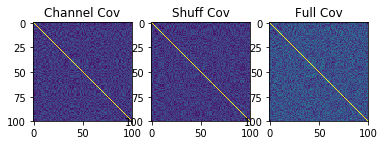

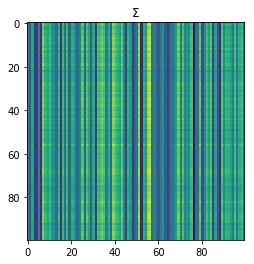

In [130]:
# Will do both arbitrary & tuning correlations
Cw = np.corrcoef(W)*.2
Cw[np.eye(n_vox)==1]=1

shuff_C = np.arange(n_vox)
np.random.shuffle(shuff_C)
Cw_shuff = Cw[shuff_C,:]
Cw_shuff = Cw_shuff[:,shuff_C]

Cw_full = Cw+Cw_shuff
Cw_full[np.eye(n_vox)==1]=1

sig = np.outer(tau,tau)@Cw_full

plt.subplot(131)
plt.imshow(Cw)
plt.title('Channel Cov')
plt.subplot(132)
plt.title('Shuff Cov')
plt.imshow(Cw_shuff)
plt.subplot(133)
plt.title('Full Cov')
plt.imshow(Cw_full)
plt.show()

plt.title('$\Sigma$')
plt.imshow(sig)
plt.show()